In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import time

In [2]:
FILES = {
    "train_images": "train-images-idx3-ubyte/train-images-idx3-ubyte",
    "train_labels": "train-labels-idx1-ubyte/train-labels-idx1-ubyte",
    "test_images": "t10k-images-idx3-ubyte/t10k-images-idx3-ubyte",
    "test_labels": "t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte"
}

DATA_DIR = "dataset"

def load_images(filename):
    with open(filename, 'rb') as f:
        _, num, rows, cols = np.frombuffer(f.read(16), dtype=np.uint32).byteswap()
        data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)
        return data

def load_labels(filename):
    with open(filename, 'rb') as f:
        _, _ = np.frombuffer(f.read(8), dtype=np.uint32).byteswap()
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

def load_mnist():
    x_train = load_images(os.path.join(DATA_DIR, FILES["train_images"]))
    y_train = load_labels(os.path.join(DATA_DIR, FILES["train_labels"]))
    x_test = load_images(os.path.join(DATA_DIR, FILES["test_images"]))
    y_test = load_labels(os.path.join(DATA_DIR, FILES["test_labels"]))
    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist()

print("Размер обучающей выборки:", x_train.shape, y_train.shape)
print("Размер тестовой выборки:", x_test.shape, y_test.shape)

Размер обучающей выборки: (60000, 28, 28) (60000,)
Размер тестовой выборки: (10000, 28, 28) (10000,)


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

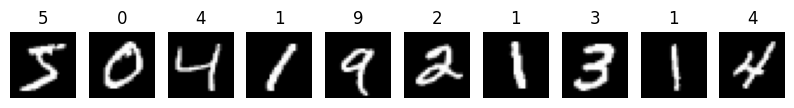

In [5]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [6]:
def ReLU(x):
    return np.maximum(0, x)

def ReLU_der(x):
    return np.where(x > 0.0, 1, 0)

def softmax(x):
    x = x - np.max(x, axis=1, keepdims=True)
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=1, keepdims=True)


In [7]:
def to_one_hot(y, num_classes=10):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

In [8]:
n_in = 784
n_hidden = 300
n_out = 10
count_epoch = 20
learning_rate = 0.1
batch_size = 32

W1 = np.random.randn(n_in, n_hidden) * np.sqrt(2.0 / (n_in + n_hidden))
b1 = np.zeros((1, n_hidden))

W2 = np.random.randn(n_hidden, n_out) * np.sqrt(2.0 / (n_in + n_hidden))
b2 = np.zeros((1, n_out))

In [ ]:
def forward(x_train_batch):
    global b1, b2
    X = x_train_batch.reshape(x_train_batch.shape[0], -1)

    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = ReLU(hidden_layer_input)
    final_output = np.dot(hidden_layer_output, W2) + b2
    final_output = softmax(final_output)

    return hidden_layer_input, hidden_layer_output, final_output

def backward(final_output, y_train_batch, hidden_layer_output, hidden_layer_input, x_train_batch):
    global W1, W2, b1, b2
    
    dldz1 = (final_output - y_train_batch.reshape(batch_size, -1)) / batch_size
    dW2 = np.dot(hidden_layer_output.T, dldz1)

    dldz2 = np.dot(dldz1, W2.T) * ReLU_der(hidden_layer_input)
    dW1 = np.dot(x_train_batch.reshape(batch_size, -1).T, dldz2)

    db2 = np.sum(dldz1, axis=0, keepdims=True)
    db1 = np.sum(dldz2, axis=0, keepdims=True)

    # update
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2

In [10]:
for epoch in range(count_epoch):
    start = time.time()
    for i in range(0, int(len(x_train)), batch_size):
        x_train_batch = x_train[i: i + batch_size]
        y_train_batch = y_train[i: i + batch_size]

        # forward pass
        hidden_layer_input, hidden_layer_output, final_output = forward(x_train_batch)

        # backward pass
        backward(final_output, y_train_batch, hidden_layer_output, hidden_layer_input, x_train_batch)
    finish = time.time()

    _, _, final_output = forward(x_train)
    true_labels = np.argmax(y_train, axis=1)
    predicted_labels = np.argmax(final_output, axis=1)
    accuracy = np.mean(predicted_labels == true_labels)

    print(f"Epoch {epoch+1}: accuracy={accuracy:.4f}, time={(finish - start):.2f}")

Epoch 1: accuracy=0.9450, time=5.10
Epoch 2: accuracy=0.9649, time=4.61
Epoch 3: accuracy=0.9745, time=4.61
Epoch 4: accuracy=0.9804, time=4.50
Epoch 5: accuracy=0.9838, time=4.72
Epoch 6: accuracy=0.9864, time=4.87
Epoch 7: accuracy=0.9887, time=4.72
Epoch 8: accuracy=0.9899, time=6.38
Epoch 9: accuracy=0.9914, time=7.60
Epoch 10: accuracy=0.9925, time=6.52
Epoch 11: accuracy=0.9935, time=5.43
Epoch 12: accuracy=0.9940, time=5.42
Epoch 13: accuracy=0.9948, time=5.33
Epoch 14: accuracy=0.9954, time=5.65
Epoch 15: accuracy=0.9961, time=5.45
Epoch 16: accuracy=0.9965, time=5.20
Epoch 17: accuracy=0.9972, time=5.02
Epoch 18: accuracy=0.9975, time=5.09
Epoch 19: accuracy=0.9981, time=5.31
Epoch 20: accuracy=0.9984, time=5.27


In [ ]:
_, _, y_pred = forward(x_test)
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(y_pred, axis=1)
accuracy = np.mean(predicted_labels == true_labels)

print(f"Точность на тесте: {accuracy}")


Тончость на тесте: 0.9786
